In [4]:
!pip install pandas numpy matplotlib seaborn scikit-learn 

In [5]:
!pip install plotly
!pip install graphviz

In [6]:
import pandas as pd
import numpy as np
from sklearn import metrics 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.tree import plot_tree
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score,ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [7]:
import warnings
warnings.filterwarnings("ignore")

In [8]:
data = pd.read_csv("C:/Users/Computer/anaconda3/Môn Data science/Finalterm/Maternal Health Risk Data Set.csv")

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014 entries, 0 to 1013
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          1014 non-null   int64  
 1   SystolicBP   1014 non-null   int64  
 2   DiastolicBP  1014 non-null   int64  
 3   BS           1014 non-null   float64
 4   BodyTemp     1014 non-null   float64
 5   HeartRate    1014 non-null   int64  
 6   RiskLevel    1014 non-null   object 
dtypes: float64(2), int64(4), object(1)
memory usage: 55.6+ KB


In [10]:
# Check the dimension of the data
print(f"Shape of data: {data.shape}")

Shape of data: (1014, 7)


In [11]:
data[data.duplicated(keep='first')]

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
67,19,120,80,7.0,98.0,70,mid risk
72,19,120,80,7.0,98.0,70,mid risk
97,19,120,80,7.0,98.0,70,mid risk
106,50,140,90,15.0,98.0,90,high risk
107,25,140,100,6.8,98.0,80,high risk
...,...,...,...,...,...,...,...
1009,22,120,60,15.0,98.0,80,high risk
1010,55,120,90,18.0,98.0,60,high risk
1011,35,85,60,19.0,98.0,86,high risk
1012,43,120,90,18.0,98.0,70,high risk


In [12]:
data.describe()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate
count,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000
mean,29.871795,113.198225,76.460552,8.725986,98.665089,74.301775
std,13.474386,18.403913,13.885796,3.293532,1.371384,8.088702
min,10.000000,70.000000,49.000000,6.000000,98.000000,7.000000
25%,19.000000,100.000000,65.000000,6.900000,98.000000,70.000000
50%,26.000000,120.000000,80.000000,7.500000,98.000000,76.000000
75%,39.000000,120.000000,90.000000,8.000000,98.000000,80.000000
max,70.000000,160.000000,100.000000,19.000000,103.000000,90.000000


In [13]:
data[data.HeartRate < 60]

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
499,16,120,75,7.9,98.0,7,low risk
908,16,120,75,7.9,98.0,7,low risk


# DATA CLEANING

In [14]:
# Return the first 5 rows of the data
print(data.head(10))

# Create a copy of the dataset
df = data.copy()

# Save the copied data to a new CSV file
new_csv_file = 'Copied_Maternal_Health_Data.csv'
df.to_csv(new_csv_file, index=False)

print(f"Dữ liệu đã được lưu vào file CSV mới: {new_csv_file}")

   Age  SystolicBP  DiastolicBP     BS  BodyTemp  HeartRate  RiskLevel
0   25         130           80  15.00      98.0         86  high risk
1   35         140           90  13.00      98.0         70  high risk
2   29          90           70   8.00     100.0         80  high risk
3   30         140           85   7.00      98.0         70  high risk
4   35         120           60   6.10      98.0         76   low risk
5   23         140           80   7.01      98.0         70  high risk
6   23         130           70   7.01      98.0         78   mid risk
7   35          85           60  11.00     102.0         86  high risk
8   32         120           90   6.90      98.0         70   mid risk
9   42         130           80  18.00      98.0         70  high risk
Dữ liệu đã được lưu vào file CSV mới: Copied_Maternal_Health_Data.csv


In [15]:
df = df.drop_duplicates().reset_index(drop=True)
df.shape

(452, 7)

In [16]:
df.loc[df.HeartRate == 7, "HeartRate"] = 70


In [17]:
df[df.HeartRate < 60]

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel


In [18]:
df.HeartRate.mode()

0    70
Name: HeartRate, dtype: int64

In [19]:
df.replace({"high risk":2, "mid risk":1, "low risk":0}, inplace=True)
df.head(10)

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.00,98.0,86,2
1,35,140,90,13.00,98.0,70,2
2,29,90,70,8.00,100.0,80,2
3,30,140,85,7.00,98.0,70,2
4,35,120,60,6.10,98.0,76,0
5,23,140,80,7.01,98.0,70,2
6,23,130,70,7.01,98.0,78,1
7,35,85,60,11.00,102.0,86,2
8,32,120,90,6.90,98.0,70,1
9,42,130,80,18.00,98.0,70,2


In [20]:
df.to_csv('cleaned_data.csv', index=False)
print("Dữ liệu đã được lưu vào file 'cleaned_data.csv'")


Dữ liệu đã được lưu vào file 'cleaned_data.csv'


# 1.Observation 


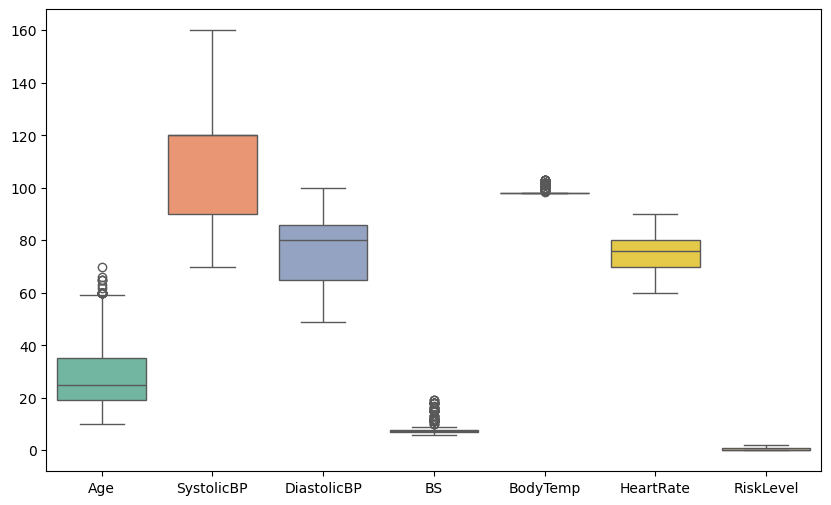

In [21]:
# Cài đặt palette cho seaborn
sns.set_palette("Set2")

# Tùy chỉnh kích thước biểu đồ
plt.figure(figsize=(10, 6))  # Kích thước: 10 x 6 inch

# Vẽ boxplot
sns.boxplot(data=df)

# Hiển thị biểu đồ
plt.show()


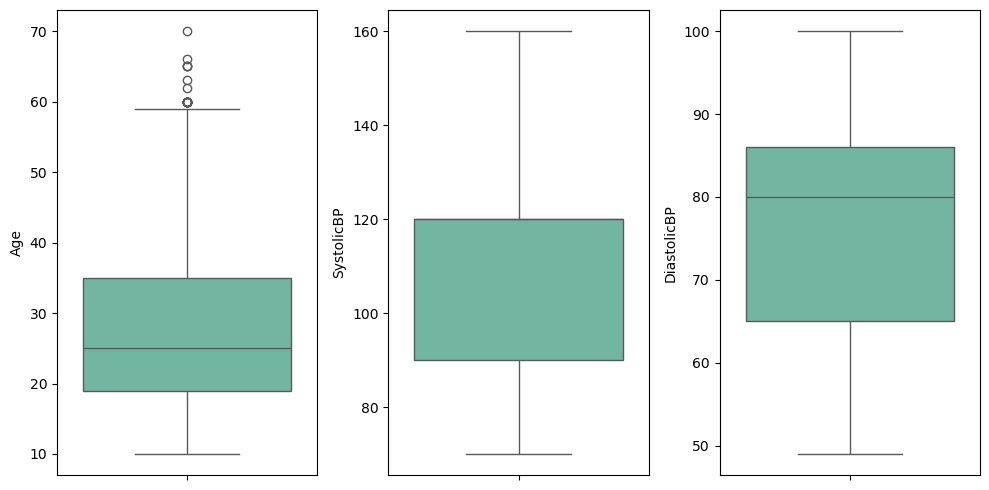

In [22]:
plt.figure(figsize=(10, 5))
plt.subplot(1,3,1)
sns.boxplot(y = 'Age', data = df)
plt.subplot(1,3,2)
sns.boxplot(y = 'SystolicBP', data = df)
plt.subplot(1,3,3)
sns.boxplot(y = 'DiastolicBP', data = df)
plt.tight_layout()
plt.show()

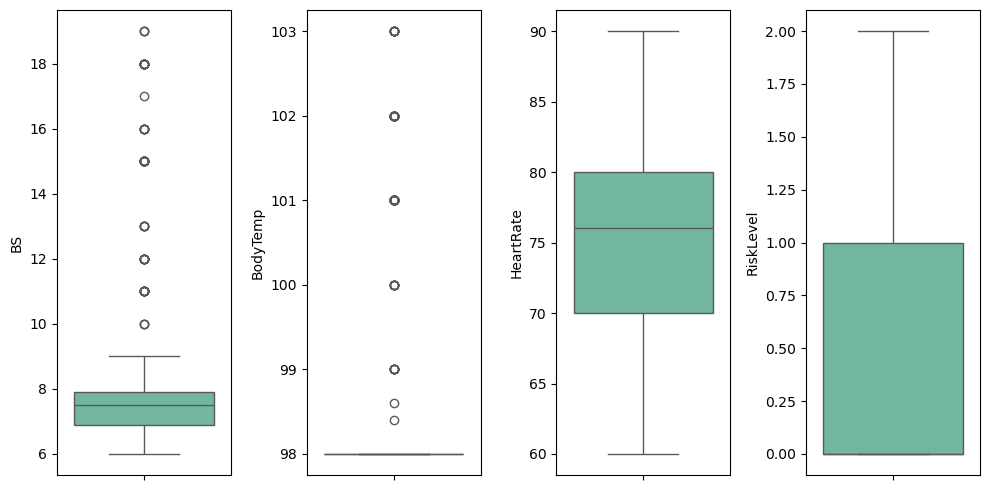

In [23]:
plt.figure(figsize=(10, 5))
plt.subplot(1,4,1)
sns.boxplot(y = 'BS', data = df)
plt.subplot(1,4,2)
sns.boxplot(y = 'BodyTemp', data = df)
plt.subplot(1,4,3)
sns.boxplot(y = 'HeartRate', data = df)
plt.subplot(1,4,4)
sns.boxplot(y = 'RiskLevel', data = df)
plt.tight_layout()
plt.show()

## Age

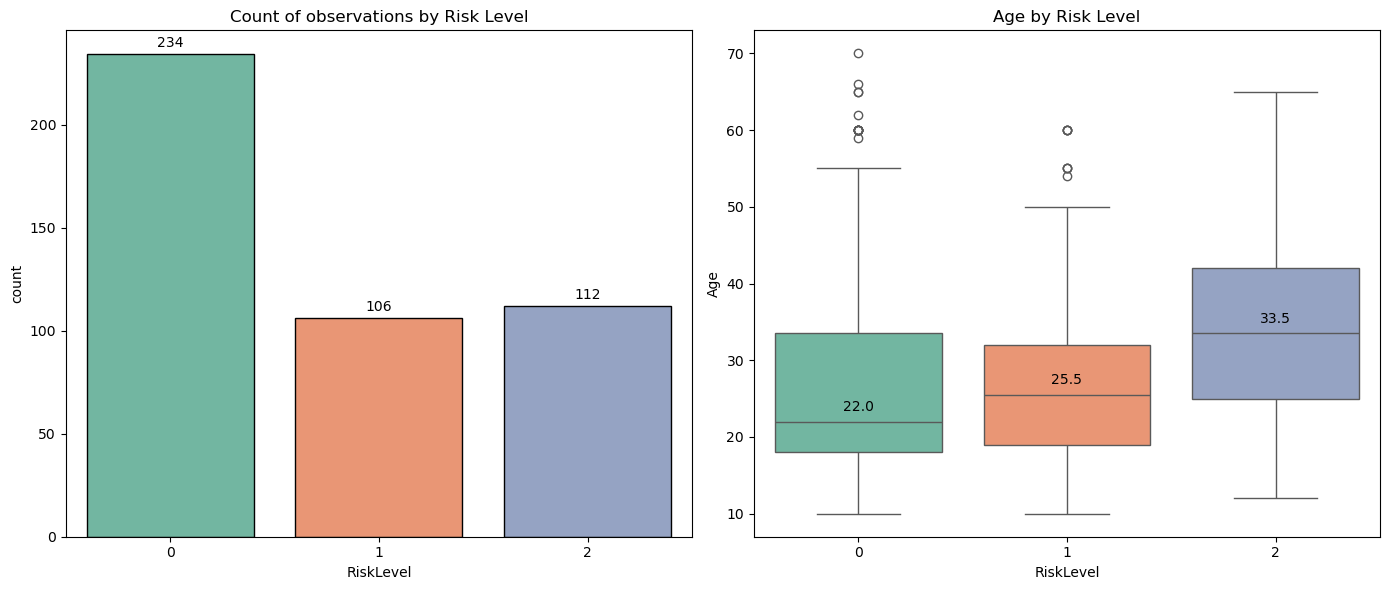

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

# Tạo subplots với 2 biểu đồ
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

# Vẽ countplot
sns.countplot(ax=axes[0], x=df.RiskLevel,edgecolor='black',palette="Set2")
axes[0].set_title("Count of observations by Risk Level")

for container in axes[0].containers:
    axes[0].bar_label(container, fmt='%d', label_type='edge', fontsize=10, padding=3)

# Vẽ boxplot
sns.boxplot(ax=axes[1], x=df.RiskLevel, y=df.Age, palette="Set2")
axes[1].set_title("Age by Risk Level")

# Hiển thị giá trị mean trên boxplot
# Tính toán giá trị trung bình cho từng nhóm
group_median = df.groupby('RiskLevel')['Age'].median()

for i, median in enumerate(group_median):
    axes[1].text(x=i, y=median + 1, s=f"{median:.1f}", 
                 color="black", fontsize=10, ha="center", va="bottom")

# Hiển thị biểu đồ
plt.tight_layout()
plt.show()


## Blood Glucose Level

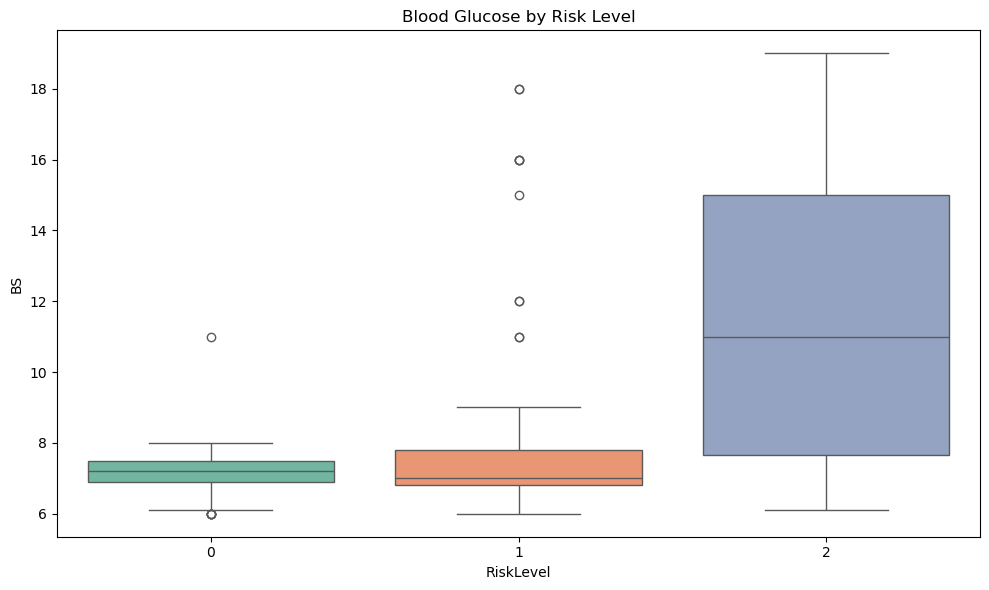

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

# Tạo biểu đồ boxplot
fig, ax = plt.subplots(figsize=(10, 6))
sns.boxplot(ax=ax, x=df.RiskLevel, y=df.BS, palette="Set2").set_title("Blood Glucose by Risk Level")
# Hiển thị biểu đồ
plt.tight_layout()
plt.show()


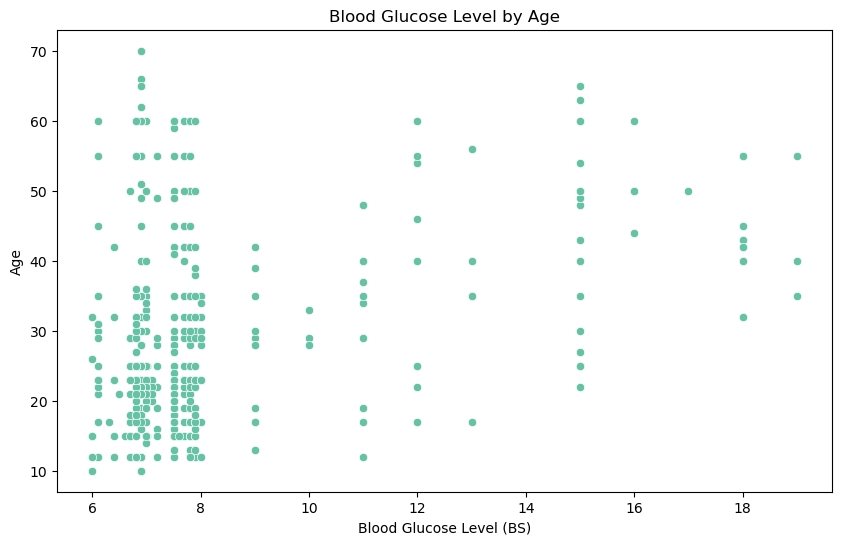

In [26]:
# Tạo figure và axes
fig, axes = plt.subplots(figsize=(10, 6))

# Vẽ biểu đồ scatterplot
sns.scatterplot(x='BS', y='Age', data=df, ax=axes)

# Thiết lập tiêu đề và nhãn cho trục
axes.set_title("Blood Glucose Level by Age")
axes.set_xlabel("Blood Glucose Level (BS)")
axes.set_ylabel("Age")

# Hiển thị biểu đồ
plt.show()

## Blood Pressure

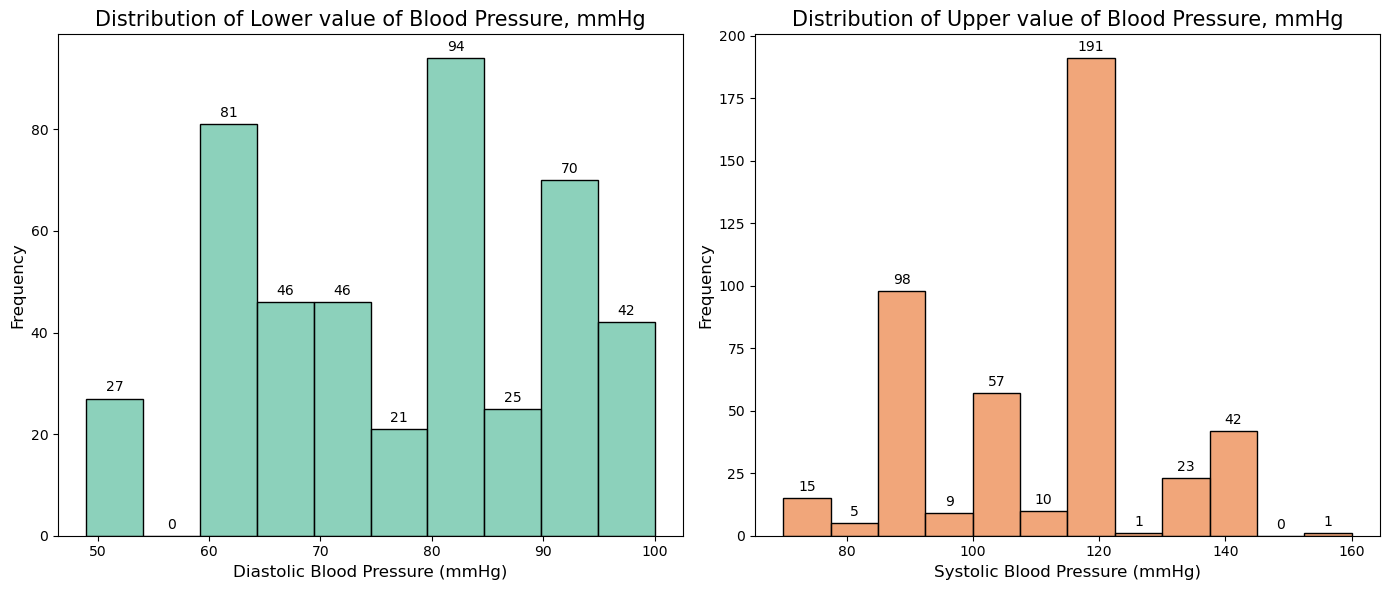

In [27]:
# Sử dụng bảng màu Set2
set2_colors = sns.color_palette('Set2')

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

# Vẽ histogram cho DiastolicBP với màu từ Set2
sns.histplot(ax=axes[0], x=df.DiastolicBP, edgecolor='black', color=set2_colors[0])  # Màu đầu tiên trong Set2
axes[0].set_title("Distribution of Lower value of Blood Pressure, mmHg", fontsize=15)
axes[0].set_xlabel("Diastolic Blood Pressure (mmHg)", fontsize=12)
axes[0].set_ylabel("Frequency", fontsize=12)
for container in axes[0].containers:
    axes[0].bar_label(container, fmt='%d', label_type='edge', fontsize=10, padding=3)

# Vẽ histogram cho SystolicBP với màu giữ nguyên
sns.histplot(ax=axes[1], x=df.SystolicBP, color="#ed894e", edgecolor='black')
axes[1].set_title("Distribution of Upper value of Blood Pressure, mmHg", fontsize=15)
axes[1].set_xlabel("Systolic Blood Pressure (mmHg)", fontsize=12)
axes[1].set_ylabel("Frequency", fontsize=12)
for container in axes[1].containers:
    axes[1].bar_label(container, fmt='%d', label_type='edge', fontsize=10, padding=3)

# Đảm bảo bố cục gọn gàng
plt.tight_layout()
plt.show()



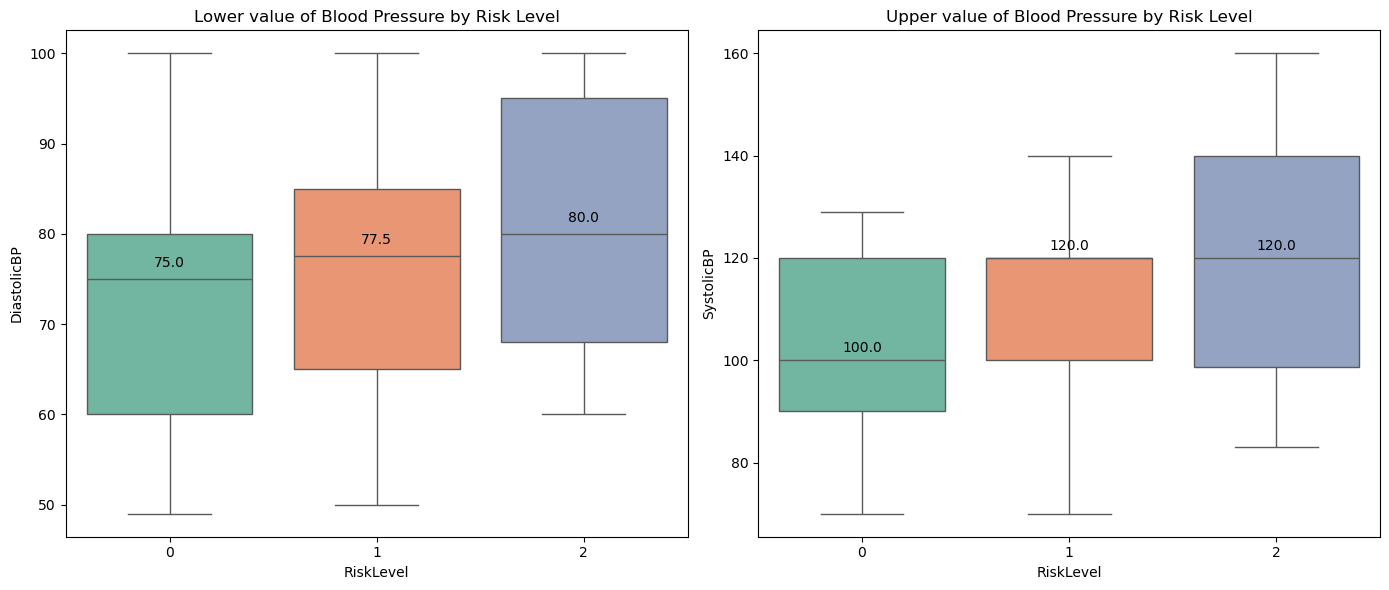

In [28]:
fig, axes = plt.subplots(nrows=1,ncols=2, figsize=(14,6))

sns.boxplot(ax=axes[0], x=df.RiskLevel, y=df.DiastolicBP, palette="Set2")
axes[0].set_title("Lower value of Blood Pressure by Risk Level")
group_median = df.groupby('RiskLevel')['DiastolicBP'].median()
for i, median in enumerate(group_median):
    axes[0].text(x=i, y=median + 1, s=f"{median:.1f}", 
                 color="black", fontsize=10, ha="center", va="bottom")

sns.boxplot(ax=axes[1], x=df.RiskLevel, y=df.SystolicBP, palette="Set2")
axes[1].set_title("Upper value of Blood Pressure by Risk Level")
group_median = df.groupby('RiskLevel')['SystolicBP'].median()
for i, median in enumerate(group_median):
    axes[1].text(x=i, y=median + 1, s=f"{median:.1f}", 
                 color="black", fontsize=10, ha="center", va="bottom")

plt.tight_layout()
plt.show()


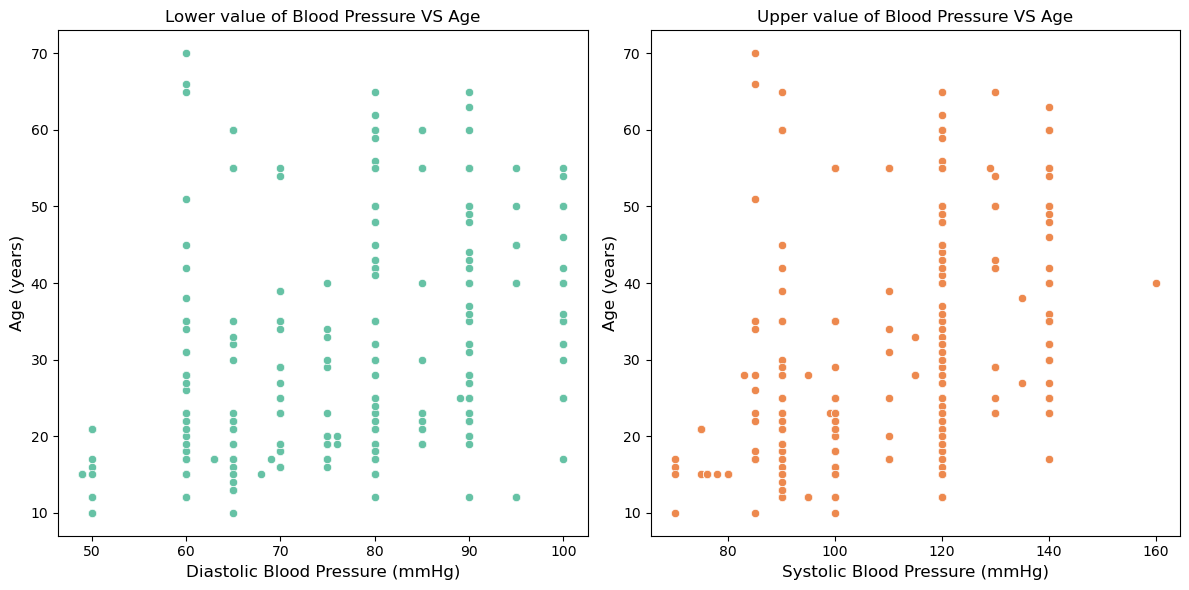

In [29]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Vẽ scatterplot cho Diastolic Blood Pressure (Huyết áp tâm trương)
sns.scatterplot(x='DiastolicBP', y='Age', data=df, ax=axes[0])
axes[0].set_title("Lower value of Blood Pressure VS Age", fontsize=12)
axes[0].set_xlabel("Diastolic Blood Pressure (mmHg)", fontsize=12)
axes[0].set_ylabel("Age (years)", fontsize=12)

# Vẽ scatterplot cho Systolic Blood Pressure (Huyết áp tâm thu) với màu sắc khác
sns.scatterplot(x='SystolicBP', y='Age', data=df, ax=axes[1], color="#ed894e")
axes[1].set_title("Upper value of Blood Pressure VS Age", fontsize=12)
axes[1].set_xlabel("Systolic Blood Pressure (mmHg)", fontsize=12)
axes[1].set_ylabel("Age (years)", fontsize=12)

# Hiển thị biểu đồ
plt.tight_layout()  # Đảm bảo khoảng cách giữa các biểu đồ không bị chồng lấp
plt.show()

## Body Temperature

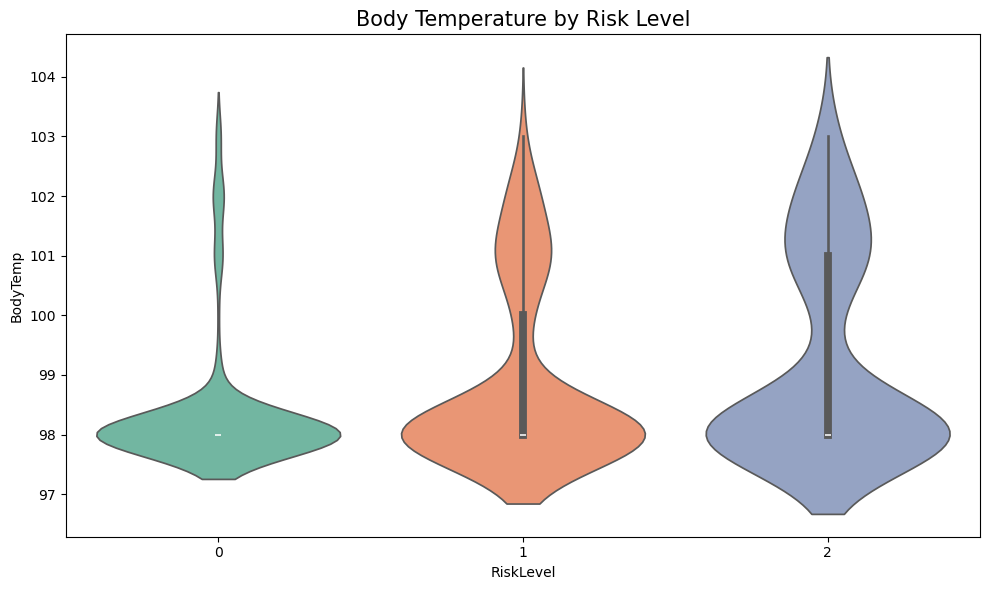

In [30]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.violinplot(ax=ax, y=df.BodyTemp, x=df.RiskLevel, palette="Set2")
ax.set_title("Body Temperature by Risk Level", fontsize=15)
plt.tight_layout()
plt.show()

## HeartRate

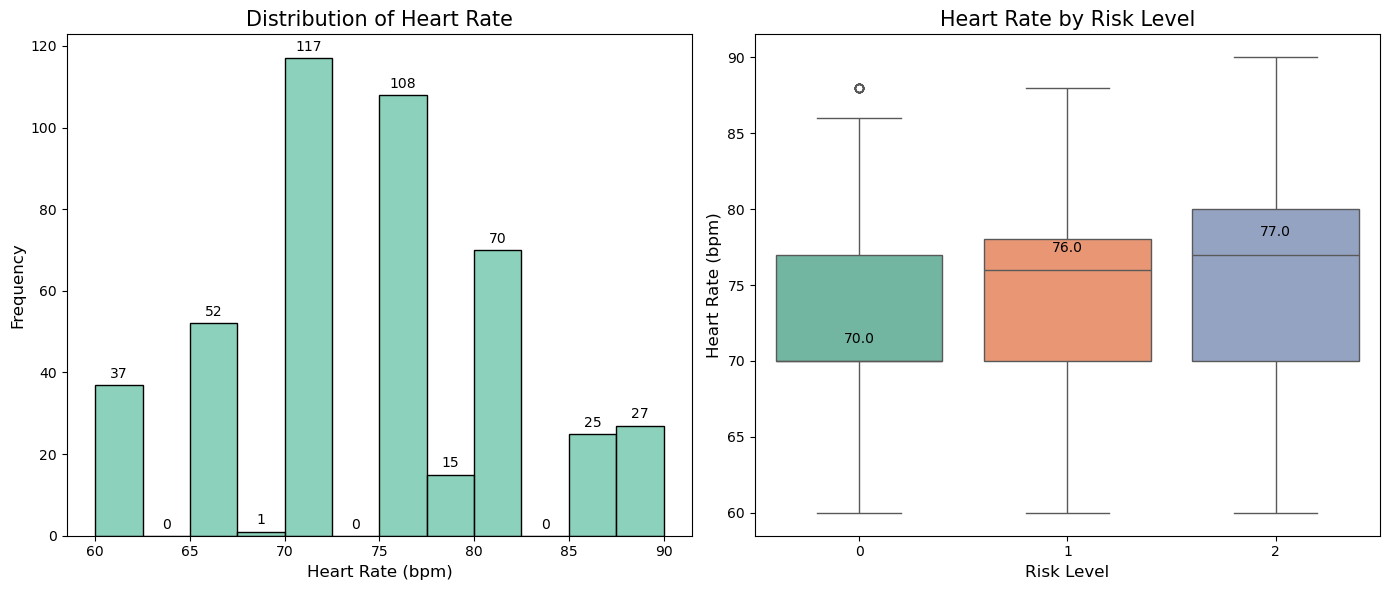

In [31]:
# Sử dụng bảng màu Set2
set2_colors = sns.color_palette('Set2')
# Tạo 2 subplots trên một hàng, 2 cột
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))
sns.histplot(data=df, x='HeartRate', ax=axes[0], color=set2_colors[0], edgecolor='black')
axes[0].set_title("Distribution of Heart Rate", fontsize=15)
axes[0].set_xlabel("Heart Rate (bpm)", fontsize=12)
axes[0].set_ylabel("Frequency", fontsize=12)
for container in axes[0].containers:
    axes[0].bar_label(container, fmt='%d', label_type='edge', fontsize=10, padding=3)
sns.boxplot(data=df, x='RiskLevel', y='HeartRate', ax=axes[1], palette="Set2")
axes[1].set_title("Heart Rate by Risk Level", fontsize=15)
axes[1].set_xlabel("Risk Level", fontsize=12)
axes[1].set_ylabel("Heart Rate (bpm)", fontsize=12)
group_median = df.groupby('RiskLevel')['HeartRate'].median()
for i, median in enumerate(group_median):
    axes[1].text(x=i, y=median + 1, s=f"{median:.1f}", 
                 color="black", fontsize=10, ha="center", va="bottom")
plt.tight_layout()
plt.show()


## All factors

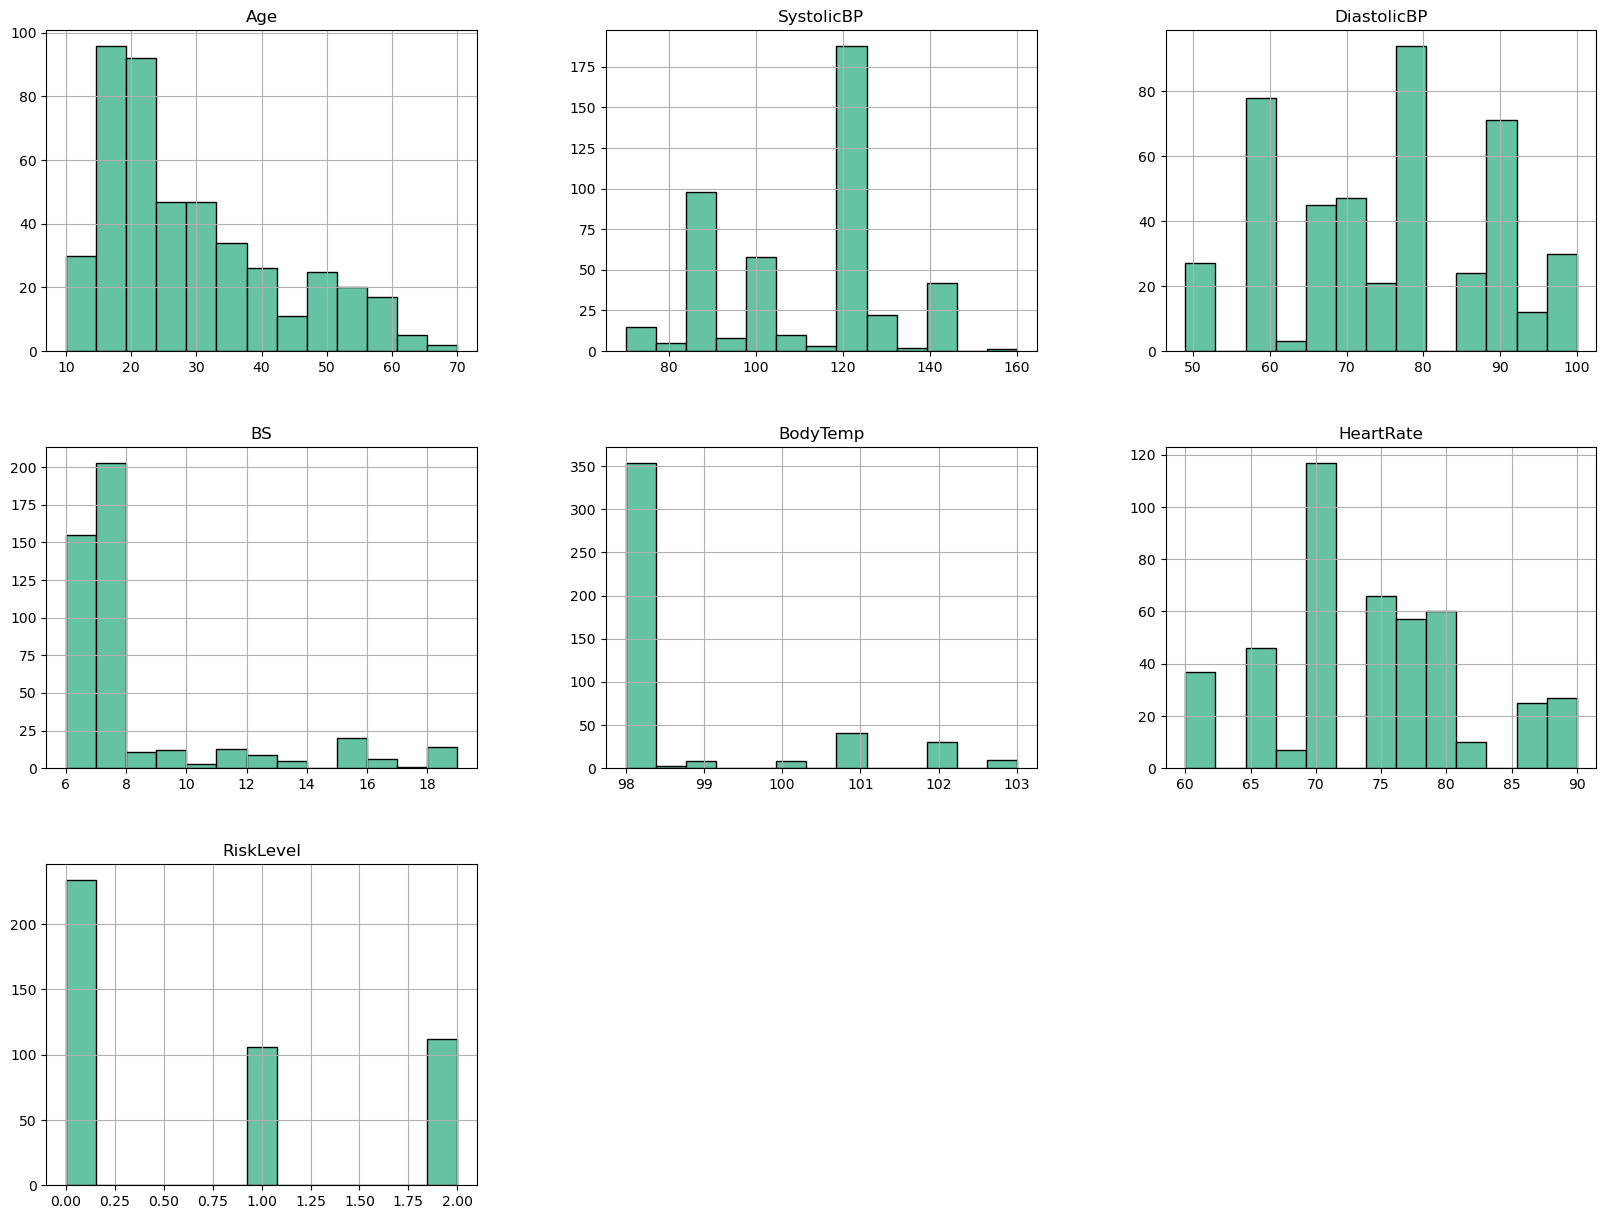

In [32]:
import matplotlib.pyplot as plt
df.hist(bins=13, figsize=(20, 15),edgecolor='black')
plt.show()

# 2.Looking correlation

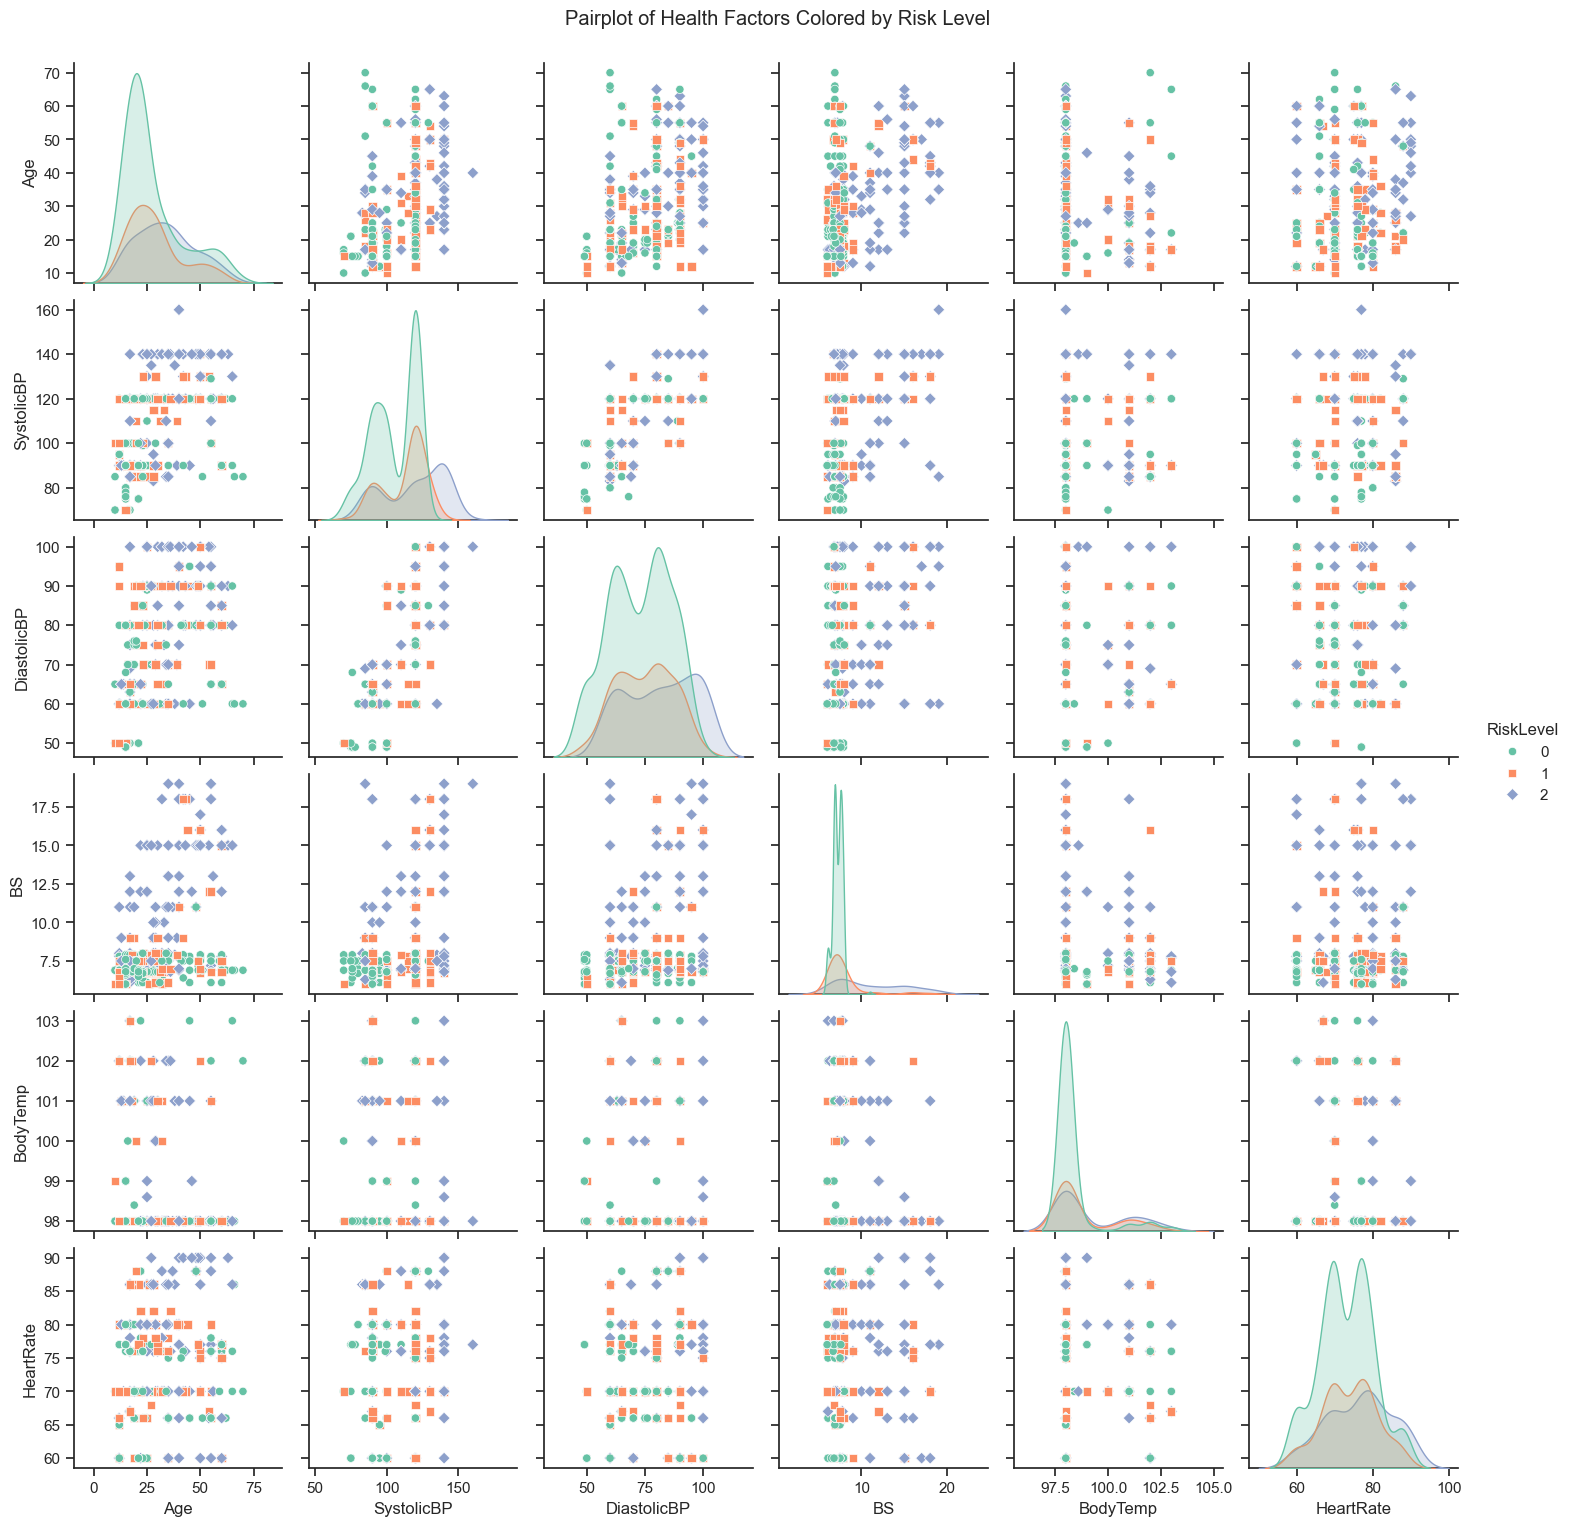

In [33]:
# Tạo Pairplot với Seaborn
sns.set(style="ticks")  # Cài đặt kiểu hiển thị mặc định

# Vẽ pairplot
pairplot = sns.pairplot(
    df, 
    hue="RiskLevel",          # Phân loại theo cột 'RiskLevel'
    diag_kind="kde",          # Sử dụng biểu đồ KDE cho các đường chéo
    palette="Set2",           # Chọn bảng màu 'Set1' cho các mức 'RiskLevel'
    markers=["o", "s", "D"]
)

# Thêm tiêu đề cho pairplot
pairplot.fig.suptitle("Pairplot of Health Factors Colored by Risk Level", y=1.02)

# Hiển thị biểu đồ
plt.show()

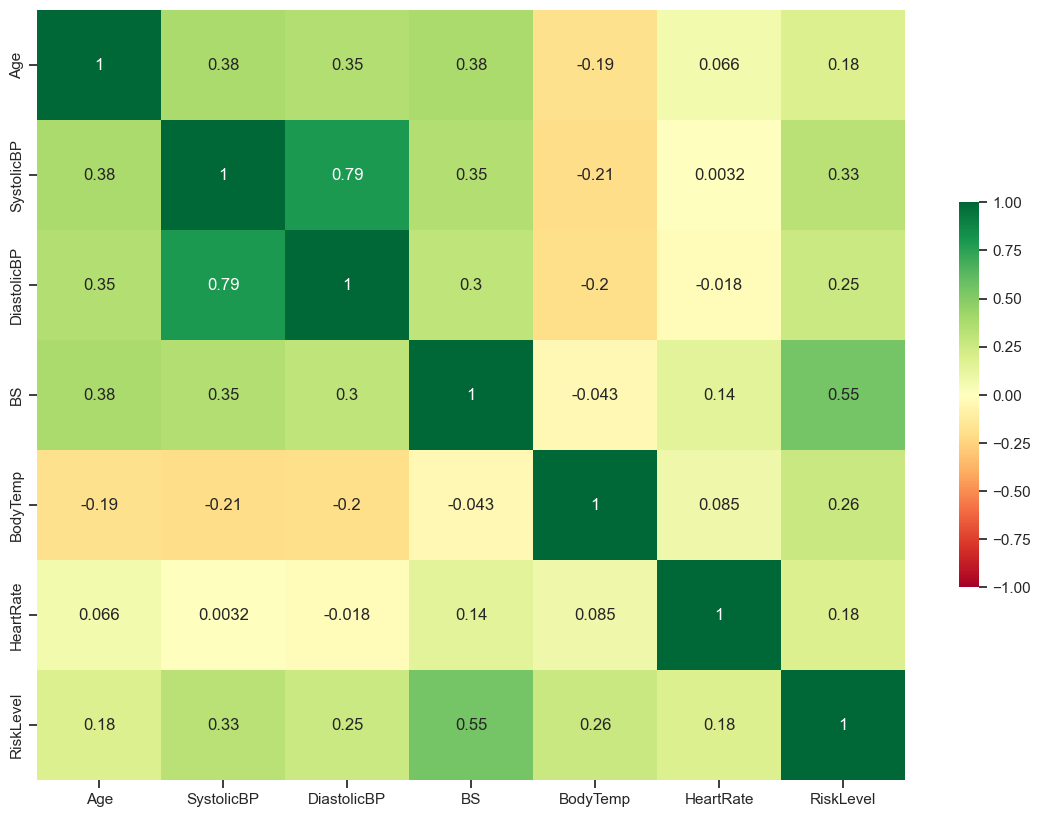

In [34]:
plt.figure(figsize=(14, 10))
sns.heatmap(df.corr(),annot=True,cmap='RdYlGn', vmin=-1, center=0,
           cbar_kws={"shrink": .5})

plt.show()

# 3.Models

### LOGISTIC REGRESSION

Confusion Matrix:
[[44  1  2]
 [13  2  6]
 [ 5  6 12]]

Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.94      0.81        47
           1       0.22      0.10      0.13        21
           2       0.60      0.52      0.56        23

    accuracy                           0.64        91
   macro avg       0.51      0.52      0.50        91
weighted avg       0.57      0.64      0.59        91

Accuracy Score: 0.64


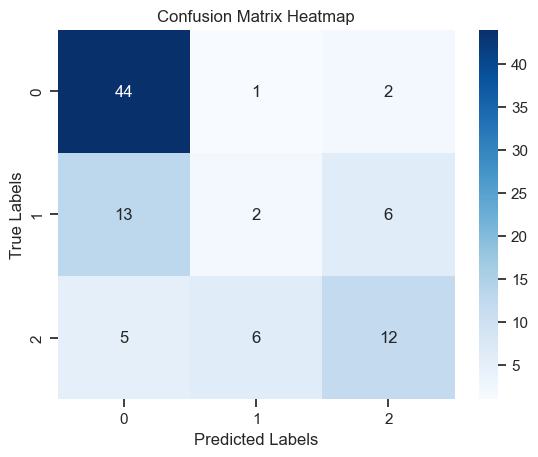

In [35]:
# Chọn các đặc trưng và biến mục tiêu
X = df[['Age', 'SystolicBP', 'DiastolicBP', 'BS', 'BodyTemp', 'HeartRate']]
y = df['RiskLevel']  # Target variable

# Chia dữ liệu thành tập huấn luyện và kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

# Khởi tạo và huấn luyện Logistic Regression
log_reg = LogisticRegression(max_iter=500)
log_reg.fit(X_train, y_train)

# Dự đoán trên tập kiểm tra
y_pred = log_reg.predict(X_test)

# Đánh giá mô hình
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy Score: {accuracy:.2f}")

# Hiển thị Confusion Matrix dưới dạng biểu đồ
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", xticklabels=log_reg.classes_, yticklabels=log_reg.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Heatmap')
plt.show()

### DECISION TREE

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.67      0.74        54
           1       0.27      0.44      0.33        18
           2       0.67      0.63      0.65        19

    accuracy                           0.62        91
   macro avg       0.59      0.58      0.57        91
weighted avg       0.69      0.62      0.64        91

Accuracy Score: 0.6153846153846154


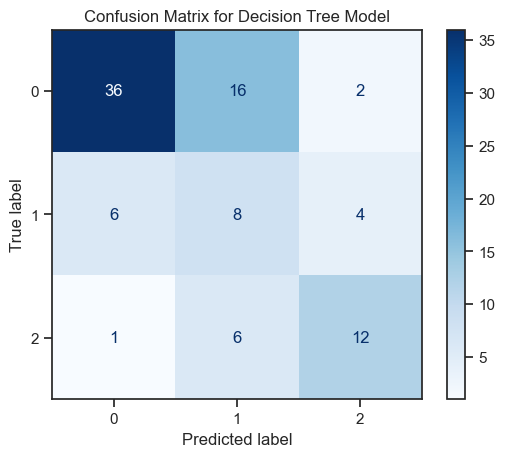

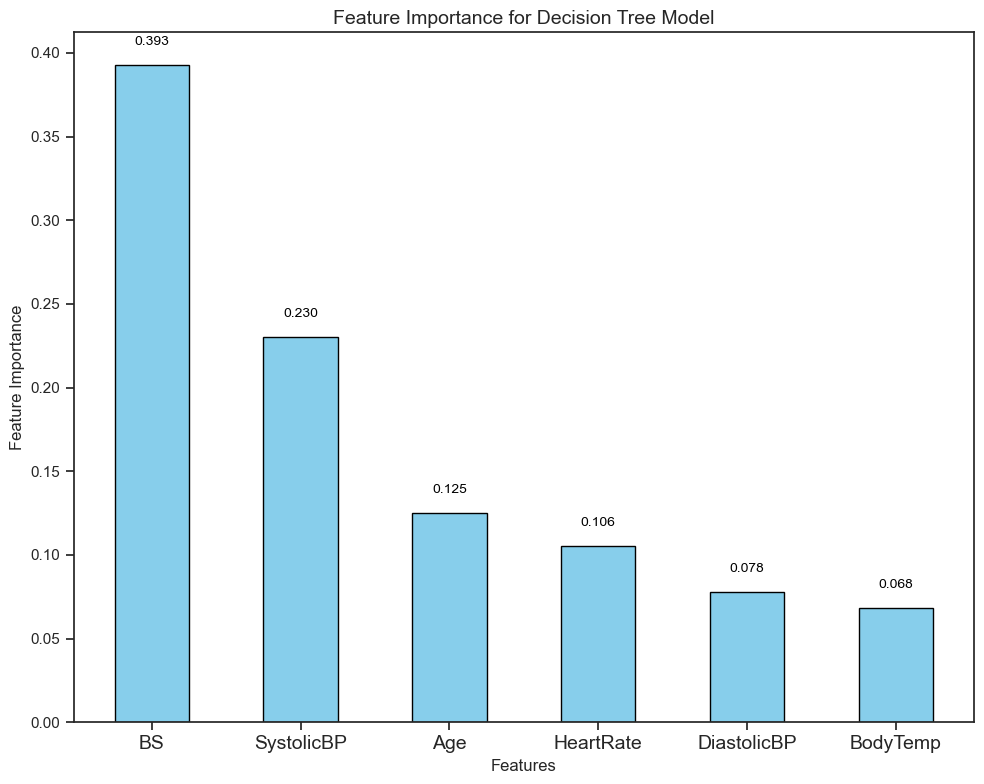

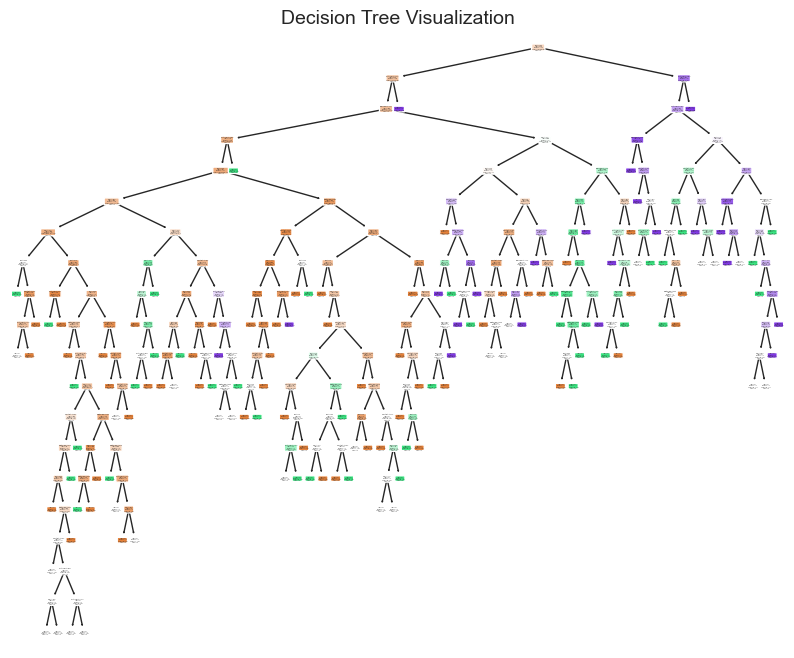

In [36]:
# 1. Chia dữ liệu thành tập huấn luyện và kiểm tra
X = df.drop(columns=['RiskLevel'])  # Các đặc trưng đầu vào
y = df['RiskLevel']  # Nhãn đầu ra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
# 2. Khởi tạo mô hình Decision Tree
dt_model = DecisionTreeClassifier(random_state=0)
# 3. Huấn luyện mô hình
dt_model.fit(X_train, y_train)
# 4. Dự đoán trên tập kiểm tra
y_pred = dt_model.predict(X_test)

# 5. Đánh giá hiệu suất mô hình
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))

# Hiển thị ma trận nhầm lẫn
ConfusionMatrixDisplay.from_estimator(dt_model, X_test, y_test, cmap="Blues")
plt.title("Confusion Matrix for Decision Tree Model")
plt.show()

# 6. Vẽ biểu đồ độ quan trọng của đặc trưng
feature_importance = dt_model.feature_importances_

# Tạo một DataFrame với tên các đặc trưng và độ quan trọng
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importance
}).sort_values(by='Importance', ascending=False)

# Vẽ biểu đồ cột dọc độ quan trọng của các đặc trưng
plt.figure(figsize=(10, 8))
bars = plt.bar(feature_importance_df['Feature'], feature_importance_df['Importance'], color='SKYblue', edgecolor='black',width =0.5)
plt.xlabel('Features', fontsize=12)
plt.ylabel('Feature Importance', fontsize=12)
plt.title('Feature Importance for Decision Tree Model', fontsize=14)

# Thêm giá trị trên đầu mỗi cột
for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.01, f'{bar.get_height():.3f}', 
             ha='center', va='bottom', fontsize=10, color='black')

# Xoay nhãn trên trục x để dễ đọc (nếu cần thiết)
plt.xticks(ha='center', fontsize=14)
plt.tight_layout()
plt.show()

# 7. Vẽ cây quyết định
plt.figure(figsize=(10, 8))
plot_tree(dt_model, feature_names=X.columns, class_names=y.unique().astype(str), filled=True, rounded=True)
plt.title("Decision Tree Visualization", fontsize=14)
plt.show()


### RANDOM FOREST 

Confusion Matrix:
[[43 10  1]
 [ 7  5  6]
 [ 2  4 13]]

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.80      0.81        54
           1       0.26      0.28      0.27        18
           2       0.65      0.68      0.67        19

    accuracy                           0.67        91
   macro avg       0.58      0.59      0.58        91
weighted avg       0.68      0.67      0.67        91


Accuracy Score: 0.6703296703296703


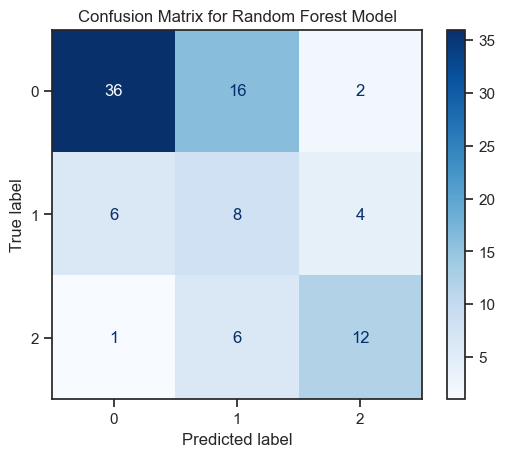

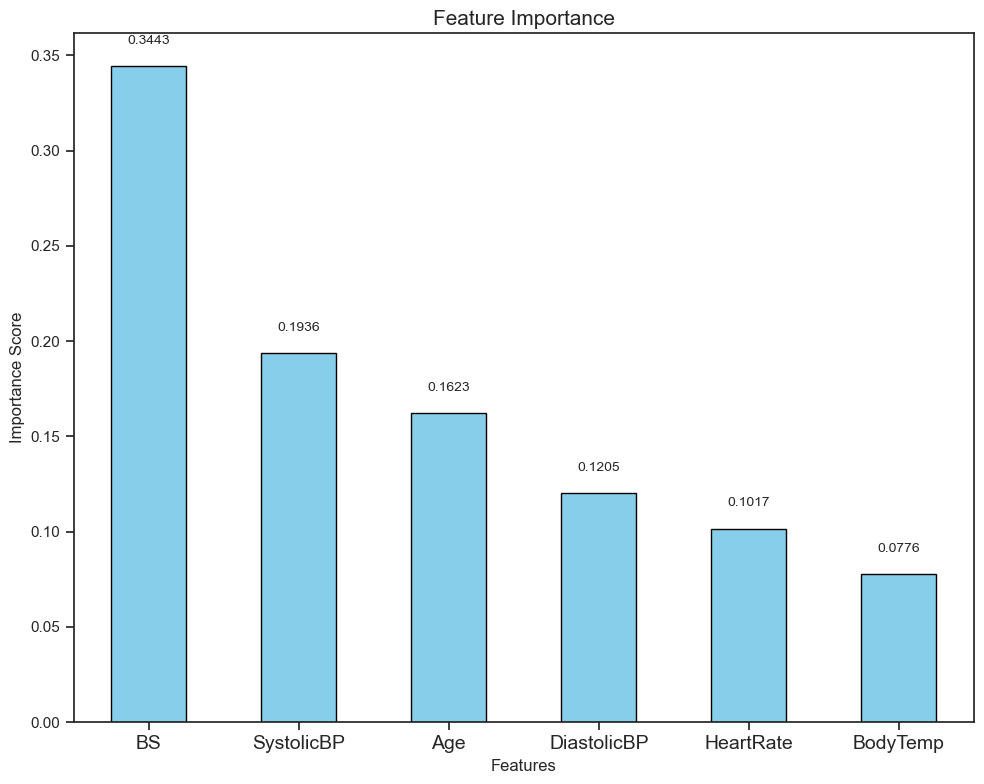

In [37]:
# Tách tập huấn luyện và kiểm tra
X = df.drop(columns=['RiskLevel'])  # Loại bỏ cột 'RiskLevel' (biến mục tiêu)
y = df['RiskLevel']  # Biến mục tiêu

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Tạo mô hình Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=0)

# Huấn luyện mô hình
rf_model.fit(X_train, y_train)

# Dự đoán trên tập kiểm tra
y_pred = rf_model.predict(X_test)

# Đánh giá hiệu suất
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nAccuracy Score:", accuracy_score(y_test, y_pred))

# Hiển thị ma trận nhầm lẫn
ConfusionMatrixDisplay.from_estimator(dt_model, X_test, y_test, cmap="Blues")
plt.title("Confusion Matrix for Random Forest Model")
plt.show()

# Tính độ quan trọng của đặc trưng
feature_importances = pd.Series(rf_model.feature_importances_, index=X.columns)
feature_importances = feature_importances.sort_values(ascending=False)

# Vẽ biểu đồ độ quan trọng của đặc trưng
plt.figure(figsize=(10,8 ))
ax = feature_importances.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Feature Importance', fontsize=15)
plt.ylabel('Importance Score', fontsize=12)
plt.xlabel('Features', fontsize=12)
# Thêm số vào các cột trên biểu đồ
for i, v in enumerate(feature_importances):
    ax.text(i, v + 0.01, f'{v:.4f}', ha='center', va='bottom', fontsize=10) 
# Xoay tiêu đề các cột ở trục x
plt.xticks(rotation=0, fontsize=14, ha='center')

plt.tight_layout()  # Đảm bảo bố cục gọn gàng
plt.show()


### MULTINOMINAL NAIVE BAYES

Confusion Matrix:
[[41  1 12]
 [12  1  5]
 [ 6  1 12]]

Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.76      0.73        54
           1       0.33      0.06      0.10        18
           2       0.41      0.63      0.50        19

    accuracy                           0.59        91
   macro avg       0.48      0.48      0.44        91
weighted avg       0.56      0.59      0.55        91


Accuracy Score: 0.5934065934065934


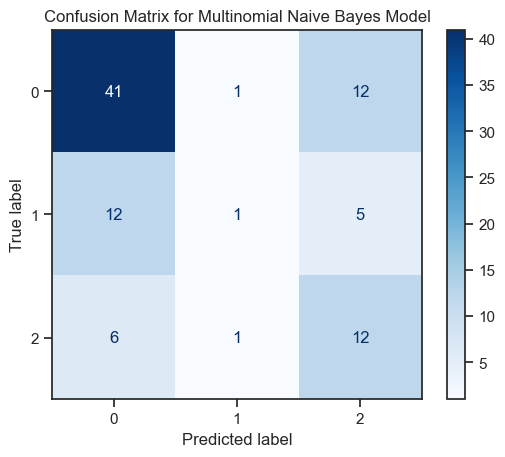

In [38]:
# Tách tập huấn luyện và kiểm tra
X = df.drop(columns=['RiskLevel'])  # Loại bỏ cột 'RiskLevel' (biến mục tiêu)
y = df['RiskLevel']  # Biến mục tiêu

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Tạo mô hình Multinomial Naive Bayes
nb_model = MultinomialNB()

# Huấn luyện mô hình
nb_model.fit(X_train, y_train)

# Dự đoán trên tập kiểm tra
y_pred = nb_model.predict(X_test)

# Đánh giá hiệu suất
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nAccuracy Score:", accuracy_score(y_test, y_pred))

# Hiển thị ma trận nhầm lẫn
ConfusionMatrixDisplay.from_estimator(nb_model, X_test, y_test, cmap="Blues")
plt.title("Confusion Matrix for Multinomial Naive Bayes Model")
plt.show()


### SOFTMAX REGRESSION 

Confusion Matrix:
[[52  0  2]
 [12  3  3]
 [ 5  1 13]]

Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.96      0.85        54
           1       0.75      0.17      0.27        18
           2       0.72      0.68      0.70        19

    accuracy                           0.75        91
   macro avg       0.74      0.60      0.61        91
weighted avg       0.75      0.75      0.70        91


Accuracy Score: 0.7472527472527473


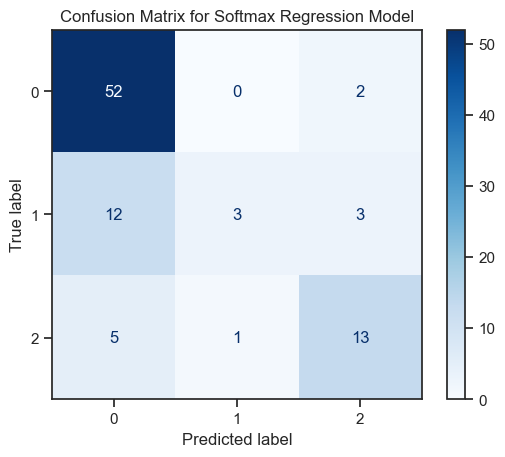

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Tạo mô hình Softmax Regression
softmax_model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)

# Huấn luyện mô hình
softmax_model.fit(X_train, y_train)

# Dự đoán trên tập kiểm tra
y_pred = softmax_model.predict(X_test)

# Đánh giá hiệu suất
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nAccuracy Score:", accuracy_score(y_test, y_pred))

# Hiển thị ma trận nhầm lẫn
ConfusionMatrixDisplay.from_estimator(softmax_model, X_test, y_test, cmap="Blues")
plt.title("Confusion Matrix for Softmax Regression Model")
plt.show()

### SUPPORT VECTOR MACHINE

Fitting 5 folds for each of 48 candidates, totalling 240 fits
Best Parameters from GridSearchCV: {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
Confusion Matrix:
[[51  3  0]
 [ 9  3  6]
 [ 2  2 15]]

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.94      0.88        54
           1       0.38      0.17      0.23        18
           2       0.71      0.79      0.75        19

    accuracy                           0.76        91
   macro avg       0.64      0.63      0.62        91
weighted avg       0.71      0.76      0.72        91


Accuracy Score: 0.7582417582417582


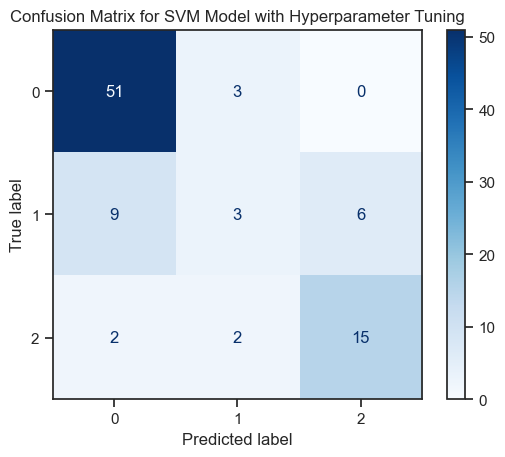


Cross-Validation Scores:  [0.68493151 0.68055556 0.63888889 0.68055556 0.70833333]

Mean Cross-Validation Score:  0.6786529680365297


In [40]:
# Giả sử bạn đã có DataFrame df với các đặc trưng và nhãn (target)
X = df.drop('RiskLevel', axis=1)  # Các đặc trưng (features)
y = df['RiskLevel']  # Nhãn mục tiêu (target)

# Chia dữ liệu thành train và test (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# 1. Chuẩn hóa dữ liệu (Standardization)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 2. GridSearchCV để tìm siêu tham số tốt nhất cho mô hình SVM
param_grid = {
    'C': [0.1, 1, 10, 100],  # Regularization parameter
    'kernel': ['linear', 'rbf', 'poly'],  # Kernel types
    'gamma': ['scale', 'auto', 0.1, 1]  # Kernel coefficient for 'rbf' and 'poly'
}

# Tạo mô hình SVM
svm_model = SVC(random_state=0)

# Sử dụng GridSearchCV để tìm siêu tham số tốt nhất
grid_search = GridSearchCV(svm_model, param_grid, cv=5, verbose=2, n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

# In kết quả tốt nhất từ GridSearchCV
print("Best Parameters from GridSearchCV:", grid_search.best_params_)

# Lấy mô hình tốt nhất từ GridSearchCV
best_svm_model = grid_search.best_estimator_

# 3. Đánh giá mô hình tốt nhất trên tập kiểm tra
y_pred = best_svm_model.predict(X_test_scaled)

# 4. Đánh giá hiệu suất mô hình
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nAccuracy Score:", accuracy_score(y_test, y_pred))

# Hiển thị ma trận nhầm lẫn
ConfusionMatrixDisplay.from_estimator(best_svm_model, X_test_scaled, y_test, cmap="Blues")
plt.title("Confusion Matrix for SVM Model with Hyperparameter Tuning")
plt.show()

# 5. Cross-validation để kiểm tra tính ổn định của mô hình
cv_scores = cross_val_score(best_svm_model, X_train_scaled, y_train, cv=5)
print("\nCross-Validation Scores: ", cv_scores)
print("\nMean Cross-Validation Score: ", np.mean(cv_scores))

### KNN

k=1, Train Error: 0.0643, Test Error: 0.4234
k=2, Train Error: 0.2278, Test Error: 0.3541
k=3, Train Error: 0.2284, Test Error: 0.3581
k=4, Train Error: 0.2487, Test Error: 0.3331
k=5, Train Error: 0.2634, Test Error: 0.3386
k=6, Train Error: 0.2680, Test Error: 0.3270
k=7, Train Error: 0.2659, Test Error: 0.3285
k=8, Train Error: 0.2733, Test Error: 0.3264
k=9, Train Error: 0.2775, Test Error: 0.3288
k=10, Train Error: 0.2835, Test Error: 0.3266
k=11, Train Error: 0.2878, Test Error: 0.3254
k=12, Train Error: 0.2936, Test Error: 0.3293
k=13, Train Error: 0.2971, Test Error: 0.3273
k=14, Train Error: 0.3009, Test Error: 0.3268
k=15, Train Error: 0.3040, Test Error: 0.3260
k=16, Train Error: 0.3069, Test Error: 0.3258
k=17, Train Error: 0.3078, Test Error: 0.3278
k=18, Train Error: 0.3107, Test Error: 0.3292
k=19, Train Error: 0.3105, Test Error: 0.3269


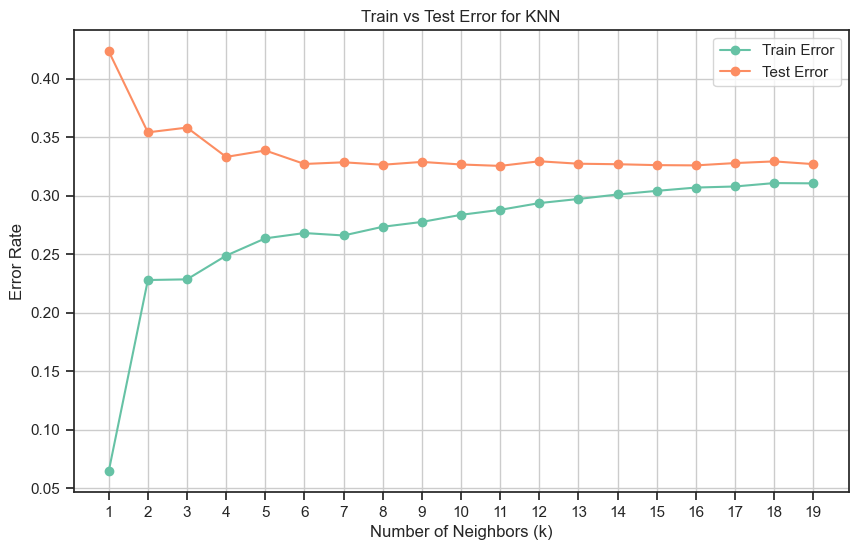

In [41]:
# Chọn các đặc trưng và nhãn
features = df.drop(columns=["RiskLevel"]).columns
target = "RiskLevel"
ss = StandardScaler()

# Lưu kết quả lỗi
knn_many_split = {}
for k in range(1, 20):
    train_error, test_error = [], []
    knn = KNeighborsClassifier(n_neighbors=k)
    for i in range(100):  # Lặp lại để giảm nhiễu từ chia dữ liệu ngẫu nhiên
        X_train, X_test, y_train, y_test = train_test_split(
            df[features], df[target], test_size=0.2, random_state=i
        )
        X_train, X_test = ss.fit_transform(X_train), ss.transform(X_test)
        knn.fit(X_train, y_train)
        train_error.append(1 - knn.score(X_train, y_train))
        test_error.append(1 - knn.score(X_test, y_test))
    knn_many_split[k] = [sum(train_error) / len(train_error), sum(test_error) / len(test_error)]
    print(f"k={k}, Train Error: {knn_many_split[k][0]:.4f}, Test Error: {knn_many_split[k][1]:.4f}")

# Tạo DataFrame từ kết quả
error_df_knn = pd.DataFrame.from_dict(knn_many_split, orient="index", columns=["Train Error", "Test Error"])

# Trực quan hóa kết quả
plt.figure(figsize=(10, 6))
# Sử dụng màu sắc từ Set2 của seaborn
colors = sns.color_palette("Set2", 2)
plt.plot(range(1, 20), error_df_knn["Train Error"], label="Train Error", marker="o",color=colors[0])
plt.plot(range(1, 20), error_df_knn["Test Error"], label="Test Error", marker="o",color=colors[1])
plt.xticks(range(1, 20))
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Error Rate")
plt.title("Train vs Test Error for KNN")
plt.legend()
plt.grid()
plt.show()


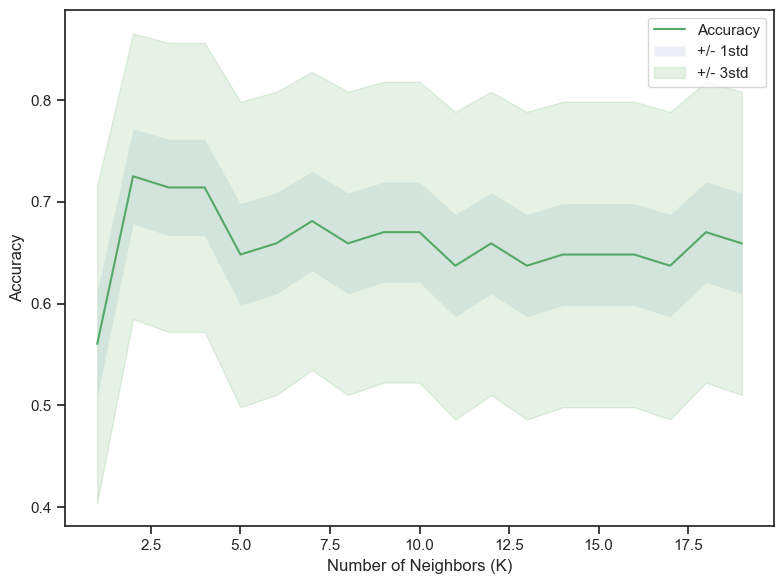

In [42]:
# Tách dữ liệu
X = df.drop(columns=['RiskLevel'])  # Các đặc trưng đầu vào (tất cả trừ RiskLevel)
y = df['RiskLevel']  # Biến mục tiêu

# Chia dữ liệu thành tập huấn luyện và kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Dùng k-Nearest Neighbors
Ks = 20
mean_acc = np.zeros(Ks - 1)
std_acc = np.zeros(Ks - 1)

for n in range(1, Ks):
    # Huấn luyện mô hình và dự đoán
    neigh = KNeighborsClassifier(n_neighbors=n).fit(X_train, y_train)
    yhat = neigh.predict(X_test)
    mean_acc[n - 1] = metrics.accuracy_score(y_test, yhat)
    std_acc[n - 1] = np.std(yhat == y_test) / np.sqrt(yhat.shape[0])

# Vẽ đồ thị
plt.figure(figsize=(8,6))
plt.plot(range(1, Ks), mean_acc, 'g')
plt.fill_between(range(1, Ks), mean_acc - 1 * std_acc, mean_acc + 1 * std_acc, alpha=0.10)
plt.fill_between(range(1, Ks), mean_acc - 3 * std_acc, mean_acc + 3 * std_acc, alpha=0.10, color="green")
plt.legend(('Accuracy', '+/- 1std', '+/- 3std'))
plt.ylabel('Accuracy')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

In [43]:
# Các tham số cho GridSearchCV
params_knn = {
    'n_neighbors': np.arange(1, 20),  # Thử nghiệm từ 1 đến 19 neighbors
    'weights': ['uniform', 'distance'],  # Trọng số
    'p': [1, 2]  # Khoảng cách sử dụng, 1 cho Manhattan, 2 cho Euclidean
}

# Khởi tạo mô hình KNN
knn = KNeighborsClassifier()

# GridSearchCV để tìm tham số tốt nhất
grid_knn = GridSearchCV(estimator=knn, param_grid=params_knn, scoring='accuracy', cv=10)
grid_knn.fit(X_train, y_train)

# Mô hình KNN tốt nhất
knn_best = grid_knn.best_estimator_
print("Best Parameters:", grid_knn.best_params_)

# Đánh giá trên tập test
test_score = knn_best.score(X_test, y_test)
print(f"Test Accuracy of Best KNN: {test_score:.4f}")

Best Parameters: {'n_neighbors': 18, 'p': 2, 'weights': 'uniform'}
Test Accuracy of Best KNN: 0.6703


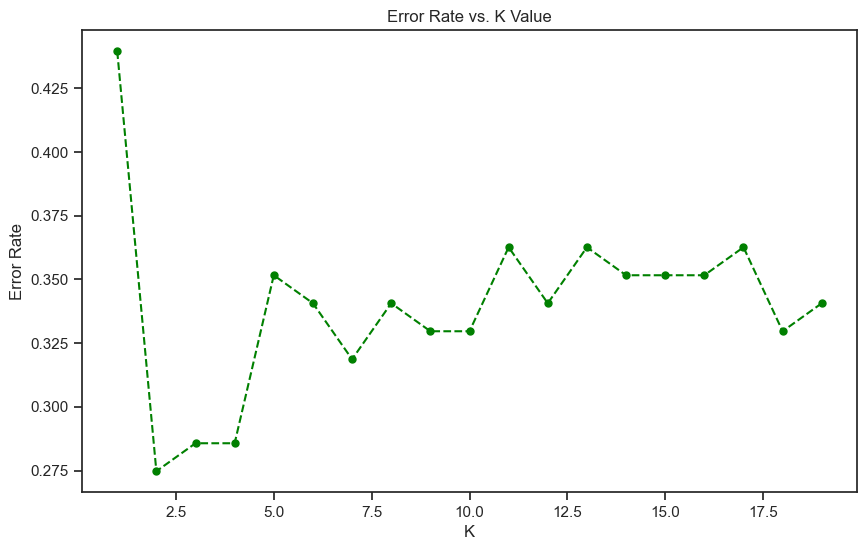

In [44]:
error_rate = []
for i in range(1,20):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))
plt.figure(figsize=(10,6))
plt.plot(range(1,20), error_rate, color='green', linestyle='dashed', marker='o',
        markerfacecolor='green', markersize=5)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate');

In [45]:
# Tìm k tốt nhất dựa trên Test Error thấp nhất
best_k = error_df_knn["Test Error"].idxmin()
best_test_error = error_df_knn["Test Error"].min()

print(f"Best k: {best_k}")
print(f"Test Error for Best k: {best_test_error:.4f}")

# Khởi tạo KNN với k tốt nhất
knn_best = KNeighborsClassifier(n_neighbors=best_k)

# Chia dữ liệu thành tập huấn luyện và kiểm tra
X_train, X_test, y_train, y_test = train_test_split(
    df[features], df[target], test_size=0.2, random_state=0
)

# Chuẩn hóa dữ liệu
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

# Huấn luyện mô hình với k tốt nhất
knn_best.fit(X_train, y_train)

# Đánh giá mô hình
print("\nEvaluation for Best k:")
print(f"Train Accuracy: {knn_best.score(X_train, y_train):.4f}")
print(f"Test Accuracy: {knn_best.score(X_test, y_test):.4f}")

Best k: 11
Test Error for Best k: 0.3254

Evaluation for Best k:
Train Accuracy: 0.7036
Test Accuracy: 0.7363


In [46]:
# Huấn Luyện Lại mô hình với k best
knn_best = KNeighborsClassifier(n_neighbors=best_k,weights='uniform')
knn_best.fit(X_train, y_train)

# Dự đoán trên tập test
y_pred_test = knn_best.predict(X_test)

# In confusion matrix và classification report
print("Confusion Matrix on Test Set:")
print(confusion_matrix(y_test, y_pred_test) )

print("\nClassification Report on Test Set:")
print(classification_report(y_test, y_pred_test))

Confusion Matrix on Test Set:
[[52  2  0]
 [12  3  3]
 [ 4  3 12]]

Classification Report on Test Set:
              precision    recall  f1-score   support

           0       0.76      0.96      0.85        54
           1       0.38      0.17      0.23        18
           2       0.80      0.63      0.71        19

    accuracy                           0.74        91
   macro avg       0.65      0.59      0.60        91
weighted avg       0.69      0.74      0.70        91



In [47]:
knn_best = KNeighborsClassifier(n_neighbors=best_k, weights='distance')
knn_best.fit(X_train, y_train)
y_pred_test = knn_best.predict(X_test)
print(confusion_matrix(y_test, y_pred_test) )
print(classification_report(y_test, y_pred_test))

[[43 10  1]
 [10  5  3]
 [ 5  3 11]]
              precision    recall  f1-score   support

           0       0.74      0.80      0.77        54
           1       0.28      0.28      0.28        18
           2       0.73      0.58      0.65        19

    accuracy                           0.65        91
   macro avg       0.58      0.55      0.56        91
weighted avg       0.65      0.65      0.65        91



### K-Means

  File "C:\Users\Computer\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\Users\Computer\anaconda3\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Computer\anaconda3\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\Users\Computer\anaconda3\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(executable, args,
                       ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


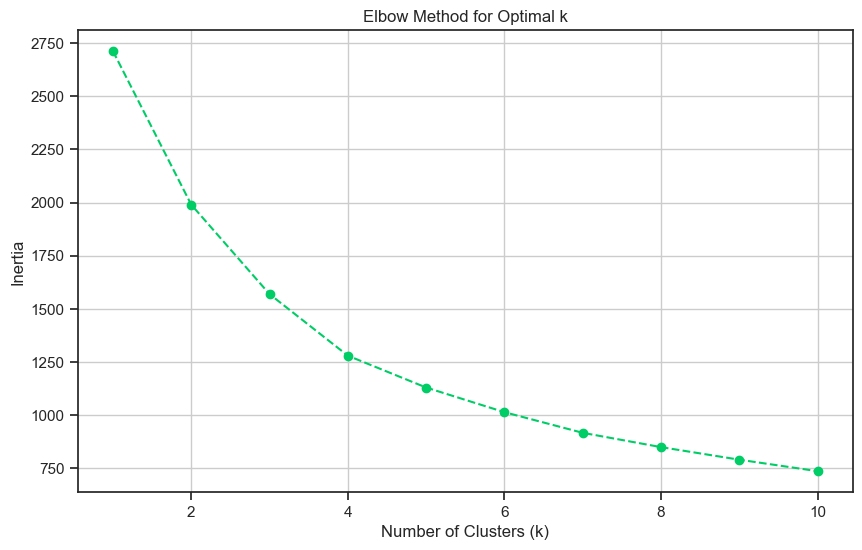

Cluster Centroids:
         Age  SystolicBP  DiastolicBP         BS   BodyTemp  HeartRate
0  44.241379  129.051724    87.500000  15.000000  98.268966  77.275862
1  30.424893  119.480687    82.278970   7.290386  98.413734  72.369099
2  21.993789   90.968944    61.136646   7.477081  99.248447  75.428571


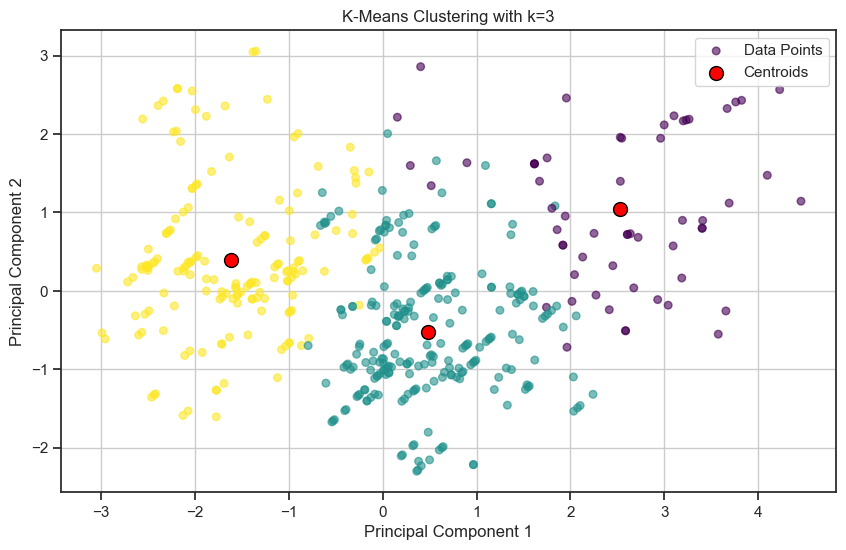

In [48]:
# Chuẩn bị dữ liệu
X = df.drop(columns=["RiskLevel"])  # Giả sử 'RiskLevel' là nhãn mà ta không sử dụng trong clustering

# Chuẩn hóa dữ liệu
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Xác định số cụm bằng phương pháp khuỷu tay
inertia = []
k_range = range(1, 11)  # Thử nghiệm với số cụm từ 1 đến 10
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=0, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Vẽ biểu đồ khuỷu tay
plt.figure(figsize=(10, 6))
plt.plot(k_range, inertia, marker="o", linestyle="--", color="#00CD66")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal k")
plt.grid(True)
plt.show()

# Sử dụng số cụm tối ưu (giả sử k=3 từ phương pháp khuỷu tay)
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=0, n_init=10)
kmeans.fit(X_scaled)

# Thêm nhãn cụm vào DataFrame gốc
df["Cluster"] = kmeans.labels_

# Hiển thị trung tâm cụm
centroids = pd.DataFrame(scaler.inverse_transform(kmeans.cluster_centers_), columns=X.columns)
print("Cluster Centroids:")
print(centroids)

# Trực quan hóa dữ liệu bằng PCA nếu số đặc trưng > 2
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans.labels_, cmap="viridis", s=30, alpha=0.6, label="Data Points")
plt.scatter(
    pca.transform(kmeans.cluster_centers_)[:, 0],
    pca.transform(kmeans.cluster_centers_)[:, 1],
    color="red", marker="o", edgecolors="black", s=100, label="Centroids"
)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title(f"K-Means Clustering with k={optimal_k}")
plt.legend()
plt.grid(True)
plt.show()


# 4.HYPOTHESIS TESTING

### In this hypothesis testing, we will prove or disapprove that women who are 30 years old and older have higher pregnancy risk level.
Let 𝜇1 be the population mean for pregnancy risk level for women under 30 y.o and 𝜇2 be the population mean for risk level for wome equal or over 30 y.o.

### H0:μ1−μ2 = 0: The risk level of pregnancy does not depend on age of a woman \ HA:μ1−μ2 # 0 Women over 30 have higher pregnacy risk level, compared to women in 20s and younger.

In [49]:
under_30 = df.loc[df.Age < 30]
under_30_risk = under_30.RiskLevel
under_mean = under_30_risk.mean()
under_mean


0.5878136200716846

In [50]:
over_30 = df.loc[df.Age >= 30]
over_30_risk = over_30.RiskLevel
over_mean = over_30_risk.mean()
over_mean

0.9595375722543352

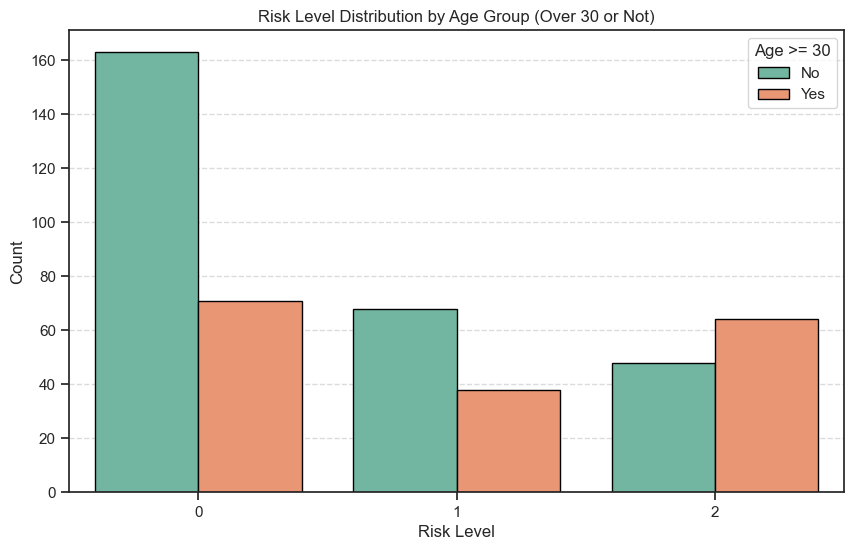

In [51]:
# Tạo cột "Age is Over30" với giá trị 1 là "Có" (tuổi >= 30), 0 là "Không" (tuổi < 30)
df['Age_is_Over30'] = df['Age'].apply(lambda x: 1 if x >= 30 else 0)

# Vẽ biểu đồ đếm với seaborn
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='RiskLevel', hue='Age_is_Over30', palette='Set2',edgecolor='black')
plt.xlabel("Risk Level")
plt.ylabel("Count")
plt.title("Risk Level Distribution by Age Group (Over 30 or Not)")
plt.legend(title="Age >= 30", labels=["No", "Yes"])
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.show()

In [52]:
import pandas as pd
from scipy.stats import chi2_contingency

# Tạo bảng contingency
contingency = pd.crosstab(df.RiskLevel, df.Age_is_Over30)
print("Contingency Table:")
print(contingency)

# Thực hiện kiểm định Chi-square
chi2, p_val, dof, exp_freq = chi2_contingency(contingency, correction=False)

# Hiển thị kết quả kiểm định
print(f"Chi-square statistic: {chi2:.4f}")
print(f"P-value: {p_val:.20f}")
print(f"Degrees of freedom: {dof}")
print("Expected frequencies:")
print(exp_freq)

# Kiểm định giả thuyết
if p_val < 0.05:
    print("Reject the null hypothesis: The risk level of pregnancy depends on the age of a woman.")
else:
    print("Fail to reject the null hypothesis: The risk level of pregnancy does not depend on the age of a woman.")


Contingency Table:
Age_is_Over30    0   1
RiskLevel             
0              163  71
1               68  38
2               48  64
Chi-square statistic: 23.3743
P-value: 0.00000840100446268846
Degrees of freedom: 2
Expected frequencies:
[[144.4380531   89.5619469 ]
 [ 65.42920354  40.57079646]
 [ 69.13274336  42.86725664]]
Reject the null hypothesis: The risk level of pregnancy depends on the age of a woman.
